In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

In [34]:
# Import the dataset
df=pd.read_csv("cleaned_data.csv")

In [36]:
def sigmoid(X):
    Y=1/(1+np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

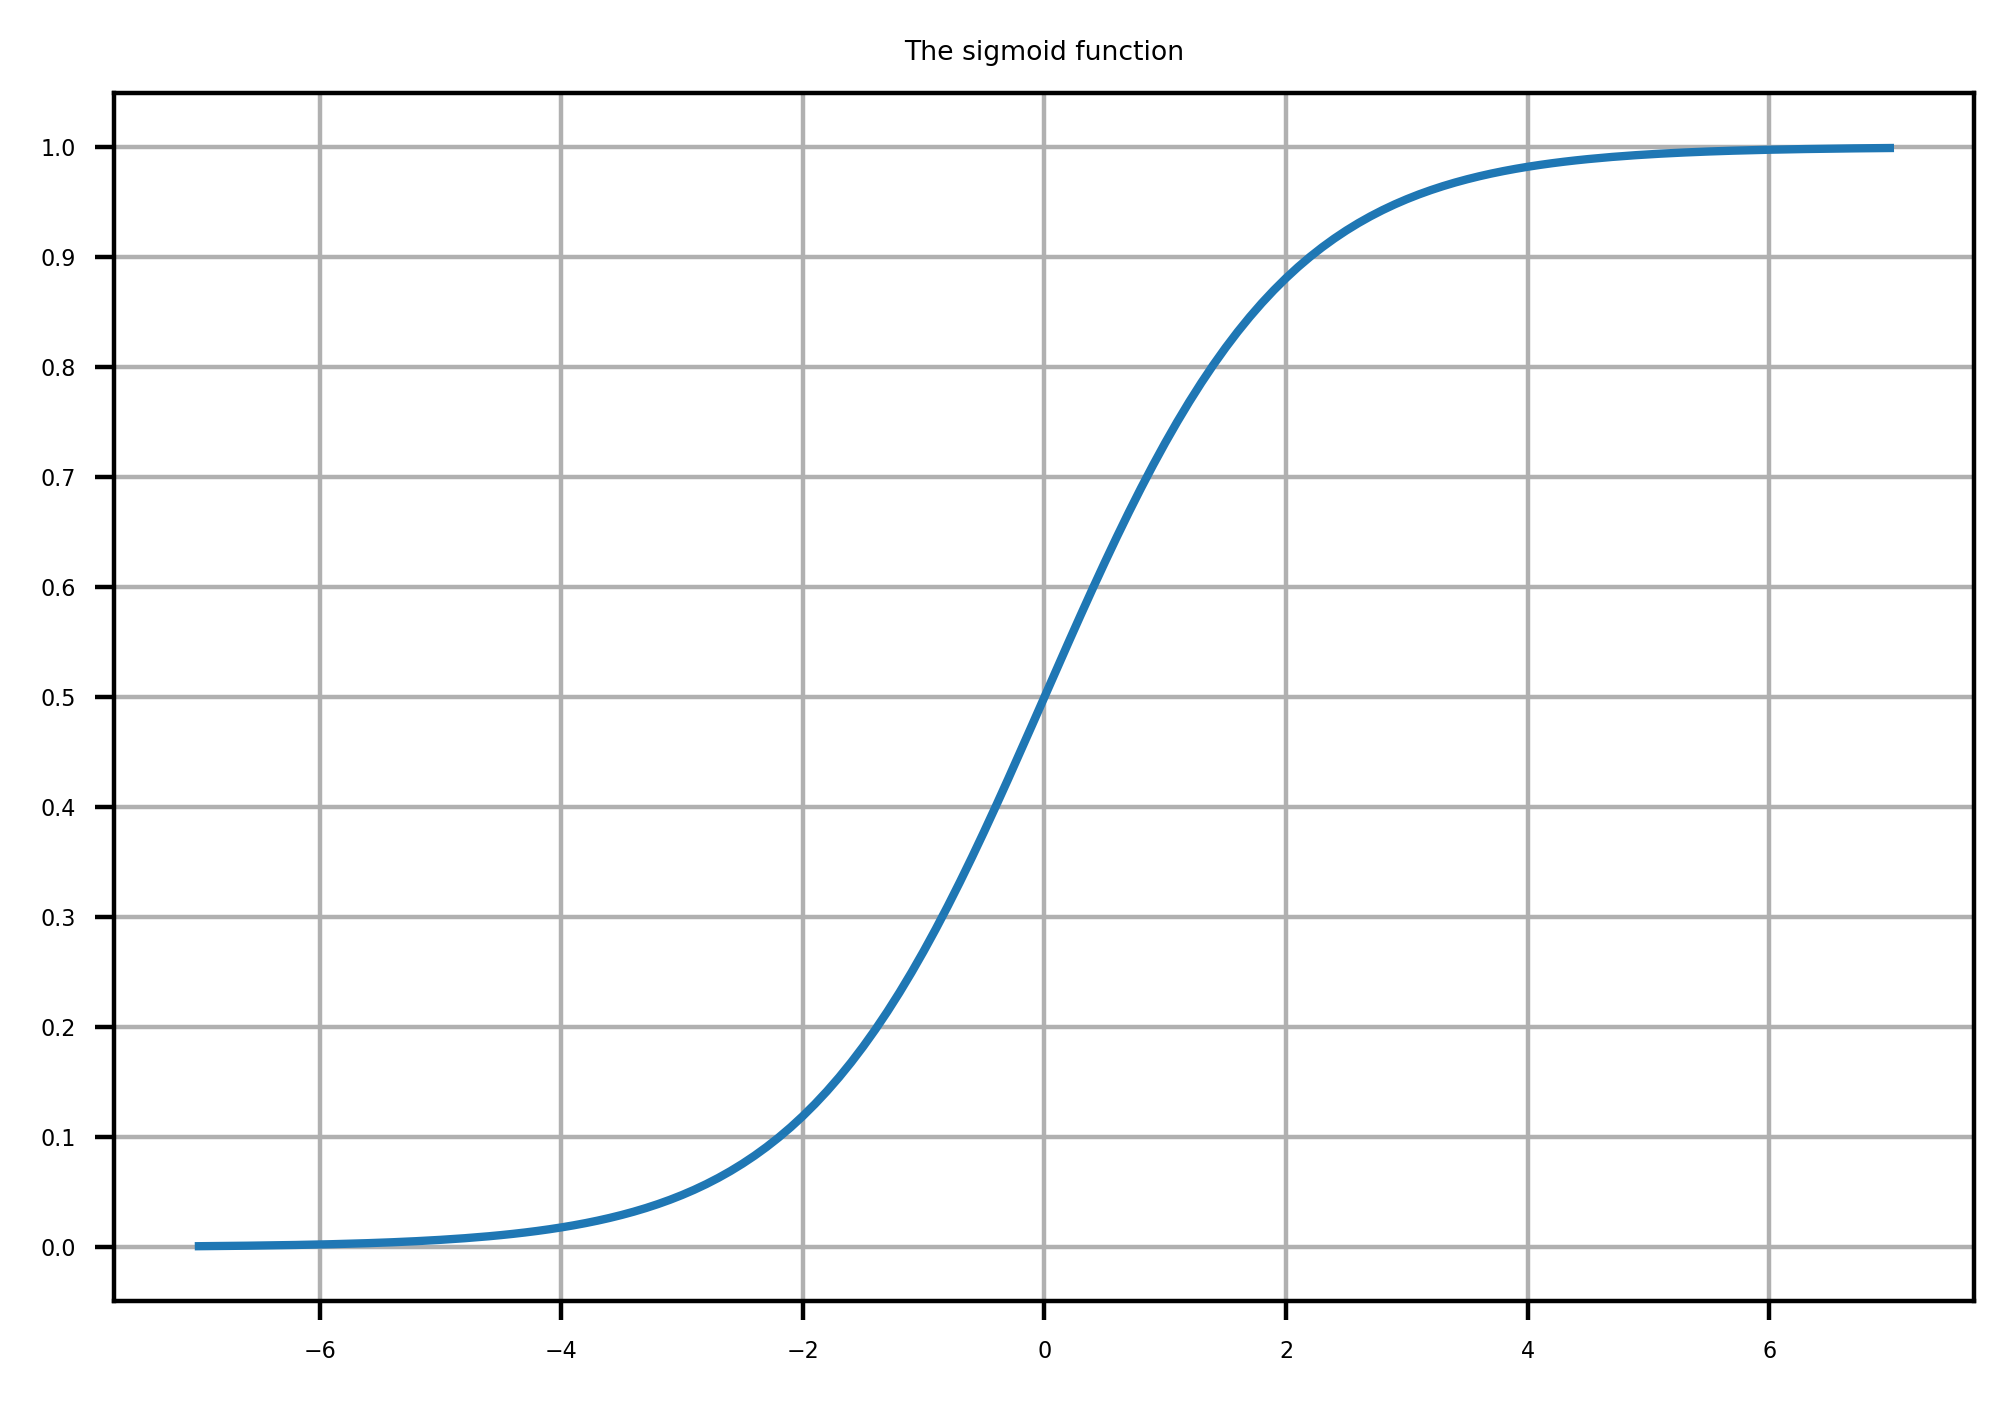

In [37]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

In [43]:
X = df[['PAY_0','LIMIT_BAL']]
y= df['default.payment.next.month']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.solver='liblinear'

In [46]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = lr.predict(X_test)

In [49]:
from sklearn import metrics
y_pred_proba =  lr.predict_proba(X_test)
y_pred_proba

array([[0.92569806, 0.07430194],
       [0.55235759, 0.44764241],
       [0.81327107, 0.18672893],
       ...,
       [0.97270602, 0.02729398],
       [0.55235759, 0.44764241],
       [0.80239636, 0.19760364]])

In [50]:
lr.coef_

array([[ 8.18359643e-11, -7.00669737e-06]])

In [51]:
theta0 = lr.intercept_
theta1 = lr.coef_[0][0]
theta2 = lr.coef_[0][1]

In [53]:
temp = theta0 + theta1*X_test['PAY_0'] + theta2*X_test['LIMIT_BAL']
predicted_probabilities = sigmoid(temp)
predicted_probabilities

25706    0.074302
2412     0.447642
13346    0.186729
23685    0.396421
9943     0.245813
           ...   
14633    0.413301
8435     0.115890
6214     0.027294
19703    0.447642
4868     0.197604
Length: 6000, dtype: float64

In [54]:
threshold_mask = predicted_probabilities>=0.5
final_pred = []
for i in threshold_mask:
    if i==True:
        final_pred.append(1)
    else:
        final_pred.append(0)

final_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [55]:
ROC_AUC_SCORE = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
ROC_AUC_SCORE

0.6068754145470769